In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

In [2]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

In [3]:
train_data

,id,loc,v(g),ev(g),iv(g),n,v,l,d,i,...,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
0,0,22.0,3.0,1.0,2.0,60.0,278.63,0.06,19.56,14.25,...,17,1,1,0,16.0,9.0,38.0,22.0,5.0,False
1,1,14.0,2.0,1.0,2.0,32.0,151.27,0.14,7.00,21.11,...,11,0,1,0,11.0,11.0,18.0,14.0,3.0,False
2,2,11.0,2.0,1.0,2.0,45.0,197.65,0.11,8.05,22.76,...,8,0,1,0,12.0,11.0,28.0,17.0,3.0,False
3,3,8.0,1.0,1.0,1.0,23.0,94.01,0.19,5.25,17.86,...,4,0,2,0,8.0,6.0,16.0,7.0,1.0,True
4,4,11.0,2.0,1.0,2.0,17.0,60.94,0.18,5.63,12.44,...,7,0,2,0,7.0,6.0,10.0,10.0,3.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101758,101758,10.0,2.0,1.0,1.0,28.0,122.98,0.15,6.60,18.63,...,7,0,1,0,11.0,8.0,16.0,12.0,3.0,False
101759,101759,27.0,5.0,4.0,1.0,107.0,559.93,0.06,18.00,34.17,...,23,0,2,0,18.0,20.0,67.0,40.0,9.0,False
101760,101760,26.0,1.0,1.0,1.0,83.0,360.17,0.04,22.75,12.56,...,20,0,4,0,10.0,8.0,51.0,28.0,1.0,False
101761,101761,10.0,2.0,1.0,2.0,43.0,191.76,0.15,6.46,29.53,...,7,0,1,0,11.0,14.0,24.0,19.0,3.0,False


In [4]:
X = train_data.drop(columns=["id", "defects"])
y = train_data["defects"]

In [5]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=7)

In [6]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

In [7]:
classifiers = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42),
    "Logistic Regression": LogisticRegression(random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Naive Bayes": GaussianNB(),
    "AdaBoost": AdaBoostClassifier(n_estimators=100, random_state=42)
}

In [8]:
results = {}
for name, clf in classifiers.items():
    print(f"Training {name}...")
    clf.fit(X_train, y_train)
    print(f"Predicting with {name}...")
    y_pred = clf.predict_proba(X_val)[:, 1]
    print(f"Calculating ROC AUC for {name}...")
    roc_auc = roc_auc_score(y_val, y_pred)
    results[name] = roc_auc
    print(f"{name} ROC AUC: {roc_auc:.4f}")

Training Random Forest...
Predicting with Random Forest...
Calculating ROC AUC for Random Forest...
Random Forest ROC AUC: 0.7707
Training Gradient Boosting...
Predicting with Gradient Boosting...
Calculating ROC AUC for Gradient Boosting...
Gradient Boosting ROC AUC: 0.7884
Training Logistic Regression...
Predicting with Logistic Regression...
Calculating ROC AUC for Logistic Regression...
Logistic Regression ROC AUC: 0.7778
Training K-Nearest Neighbors...
Predicting with K-Nearest Neighbors...
Calculating ROC AUC for K-Nearest Neighbors...
K-Nearest Neighbors ROC AUC: 0.7235
Training Decision Tree...
Predicting with Decision Tree...
Calculating ROC AUC for Decision Tree...
Decision Tree ROC AUC: 0.6186
Training Naive Bayes...
Predicting with Naive Bayes...
Calculating ROC AUC for Naive Bayes...
Naive Bayes ROC AUC: 0.7685
Training AdaBoost...
Predicting with AdaBoost...
Calculating ROC AUC for AdaBoost...
AdaBoost ROC AUC: 0.7877


In [9]:
print("Training and evaluation complete.")

Training and evaluation complete.


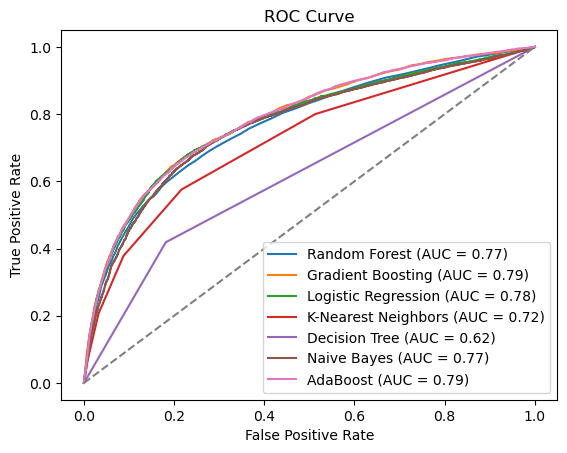

In [10]:
for name, roc_auc in results.items():
    y_pred = classifiers[name].predict_proba(X_val)[:, 1]
    fpr, tpr, _ = roc_curve(y_val, y_pred)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

In [11]:
# Save predictions as CSV files for each algorithm
for name, clf in classifiers.items():
    X_test = test_data.drop(columns=["id"])
    X_test = scaler.transform(X_test)
    y_test_pred = clf.predict_proba(X_test)[:, 1]
    submission_df = pd.DataFrame({'id': test_data['id'], 'defects': y_test_pred})
    csv_filename = f"{name.replace(' ', '_').lower()}_submission.csv"
    submission_df.to_csv(csv_filename, index=False)